# YouTube Video Popularity Prediction Model

## Name: Mukhtar Ahmed MP
## Organization: Entri Elevate

## Overview of Problem Statement:

Problem: Predicting the popularity of YouTube videos is essential for content creators and marketers to optimize their content strategies. Video views are influenced by various factors like video title, category, publication time, and more. Accurately predicting video views can help in strategizing content to maximize audience reach and engagement.

## Objective:

Develop the best model to predict the number of views a YouTube video will receive based on available features using machine learning techniques.

## Data Description:

Source: https://data.world/iamdilan/youtube-dataset/workspace/file?filename=youtube.xlsx
## Features:
video_id, trending_date, title, channel_title, category_id, publish_date, time_frame, published_day_of_week, publish_country, tags, views, likes, dislikes, comment_count, comments_disabled, ratings_disabled, video_error_or_removed.

# Data Collection

In [133]:
# Basic libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Libraries for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Libraries for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Feature selection techniques
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier

# To handle warnings if needed
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Load the dataset (modify the file path if necessary)
file_path = 'youtube.csv'  # Update with correct path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check the dimensions of the dataset
print("\nDataset Shape:", df.shape)


Dataset Overview:
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id publish_date      time_frame published_day_of_week  \
0           22   13-11-2017  17:00 to 17:59                Monday   
1           24   13-11-2017    7:00 to 7:59                Monday   
2           23   12-11-2017  19:00 to 19:59                Sunday   
3           24   13-11-2017  11:00 to 

In [135]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display basic statistical description of the dataset
print("\nStatistical Summary:")
print(df.describe(include='all'))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                161470 non-null  object
 1   trending_date           161470 non-null  object
 2   title                   161470 non-null  object
 3   channel_title           161470 non-null  object
 4   category_id             161470 non-null  int64 
 5   publish_date            161470 non-null  object
 6   time_frame              161470 non-null  object
 7   published_day_of_week   161470 non-null  object
 8   publish_country         161470 non-null  object
 9   tags                    161470 non-null  object
 10  views                   161470 non-null  int64 
 11  likes                   161470 non-null  int64 
 12  dislikes                161470 non-null  int64 
 13  comment_count           161470 non-null  int64 
 14  comments_disabl

In [136]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count'], dtype='object')
Categorical Columns: Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_date',
       'time_frame', 'published_day_of_week', 'publish_country', 'tags',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')


In [137]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Check for duplicate entries
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")



Missing Values Count:
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

Number of duplicate rows: 219


In [138]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df[numerical_cols].describe())


Descriptive Statistics:
         category_id         views         likes      dislikes  comment_count
count  161470.000000  1.614700e+05  1.614700e+05  1.614700e+05   1.614700e+05
mean       19.461151  2.419854e+06  6.566194e+04  3.490153e+03   7.035494e+03
std         7.432001  1.043749e+07  2.260617e+05  3.114779e+04   3.404121e+04
min         1.000000  2.230000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%        15.000000  1.015382e+05  1.975000e+03  8.500000e+01   2.790000e+02
50%        23.000000  3.847395e+05  9.840000e+03  3.480000e+02   1.144000e+03
75%        24.000000  1.339528e+06  4.006275e+04  1.350000e+03   4.144750e+03
max        44.000000  4.245389e+08  5.613827e+06  1.944971e+06   1.626501e+06


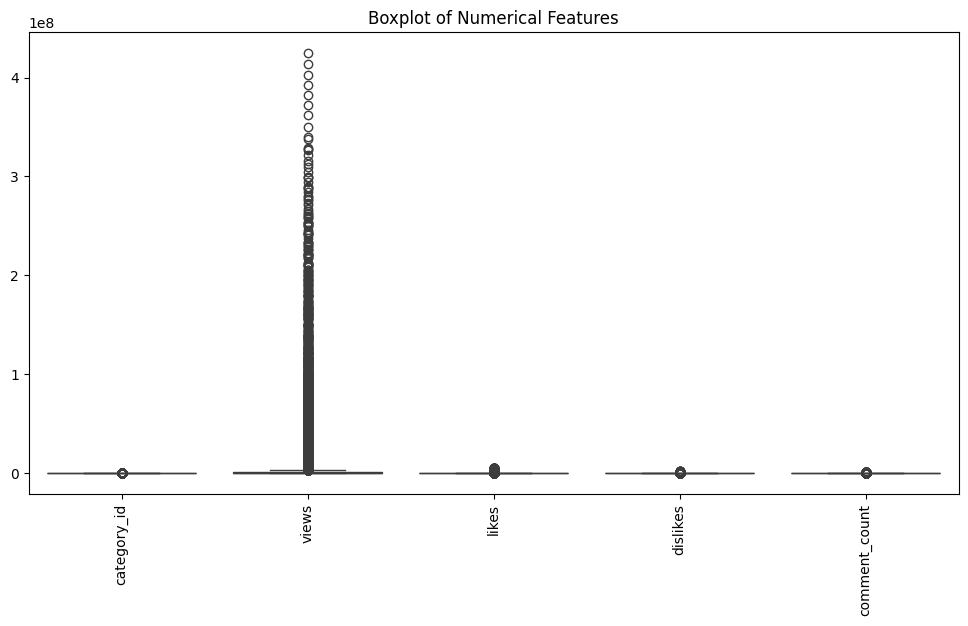

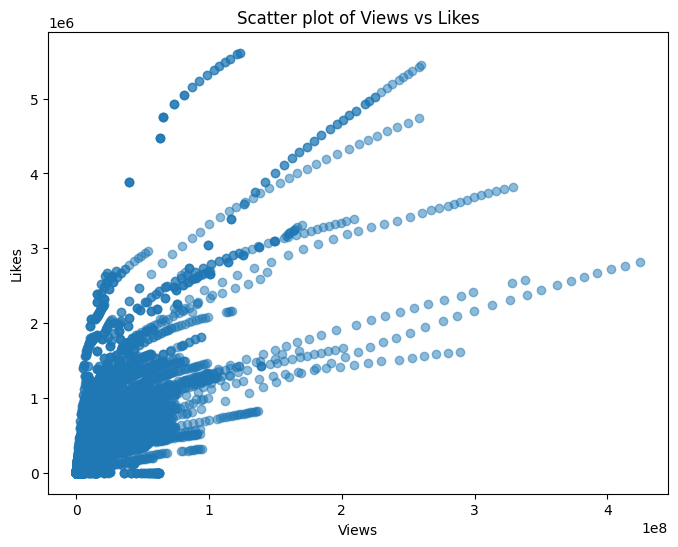

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()

# Scatter plot for views vs likes
plt.figure(figsize=(8, 6))
plt.scatter(df['views'], df['likes'], alpha=0.5)
plt.title('Scatter plot of Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


In [140]:
# Skewness of numerical columns
print("Skewness of Numerical Features:")
print(df[numerical_cols].skew())

# Kurtosis of numerical columns
print("Kurtosis of Numerical Features:")
print(df[numerical_cols].kurtosis())


Skewness of Numerical Features:
category_id      -1.072617
views            15.210491
likes            10.516397
dislikes         41.390399
comment_count    21.634146
dtype: float64
Kurtosis of Numerical Features:
category_id         0.280094
views             344.520109
likes             162.065091
dislikes         2095.766247
comment_count     669.583883
dtype: float64


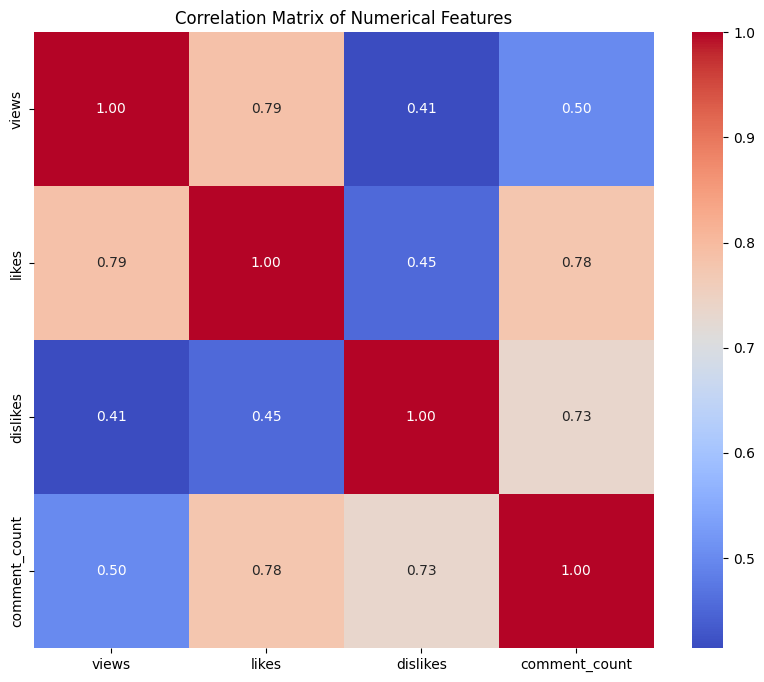

In [141]:
# Assuming `numerical_cols` includes all numerical columns except 'category_id'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('category_id')  # Remove 'category_id' from the list

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Data Preprocessing - Data Cleaning:

In [142]:
duplicates = df.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")

# Step 2: Remove duplicate records
df_cleaned = df.drop_duplicates()

# Optional: Check the shape of the original and cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you want to assign the cleaned DataFrame back to df
df = df_cleaned


Number of duplicate records: 219
Original DataFrame shape: (161470, 17)
Cleaned DataFrame shape: (161251, 17)


In [143]:
import pandas as pd

# Assuming df is your DataFrame with the specified features

# Step 1: Remove Unique Identifiers
df.drop(columns=['video_id','channel_title','title'], inplace=True, errors='ignore')

# Optional: Check the shape of the cleaned DataFrame
print(f"Cleaned DataFrame shape: {df.shape}")


Cleaned DataFrame shape: (161251, 14)


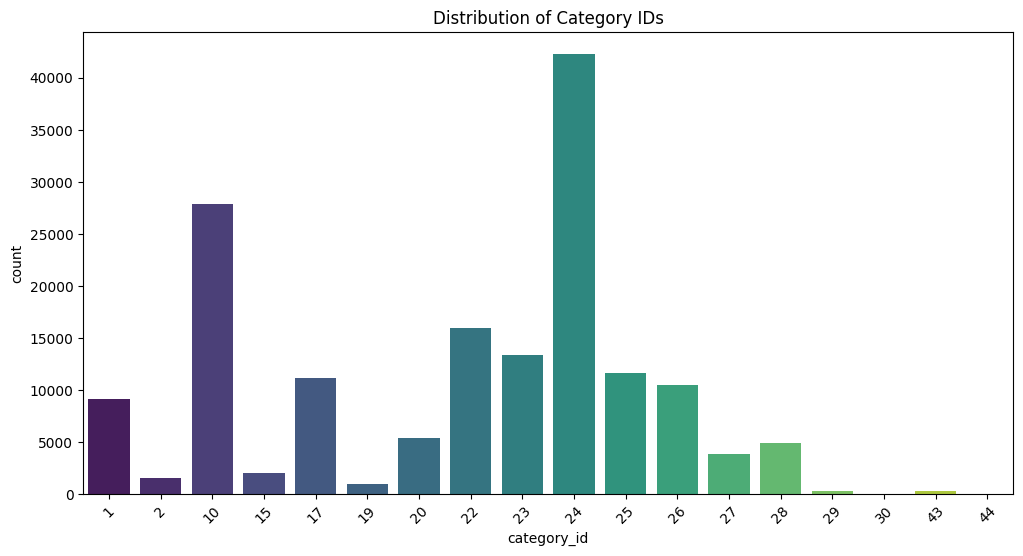

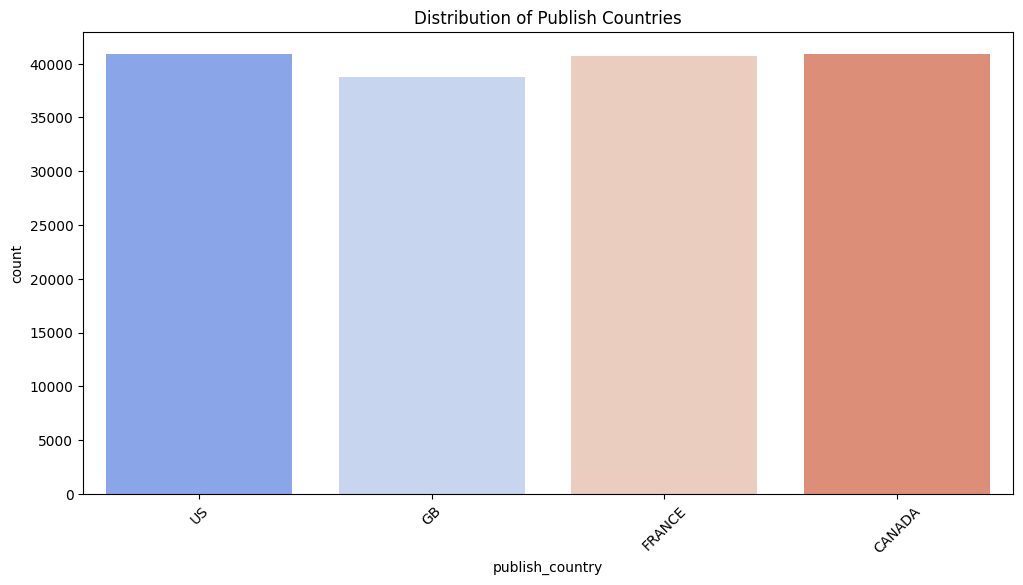

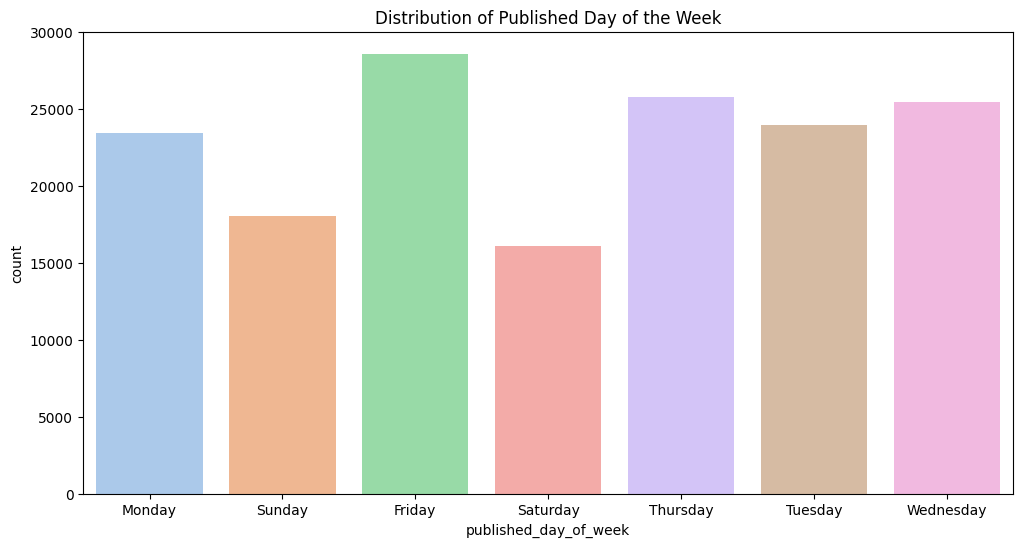

In [144]:
# 4. Visualizing Categorical Data
plt.figure(figsize=(12, 6))
sns.countplot(x='category_id', data=df, palette='viridis')
plt.title('Distribution of Category IDs')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='publish_country', data=df, palette='coolwarm')
plt.title('Distribution of Publish Countries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='published_day_of_week', data=df, palette='pastel')
plt.title('Distribution of Published Day of the Week')
plt.show()

In [145]:
# Handling outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
for col in ['views', 'likes', 'dislikes', 'comment_count']:
    df = remove_outliers_iqr(df, col)

# Addressing skewed data using log transformation
for col in ['views', 'likes', 'dislikes', 'comment_count']:
    df[col] = np.log1p(df[col])

# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(df.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 105165 entries, 3 to 161469
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   trending_date           105165 non-null  object 
 1   category_id             105165 non-null  int64  
 2   publish_date            105165 non-null  object 
 3   time_frame              105165 non-null  object 
 4   published_day_of_week   105165 non-null  object 
 5   publish_country         105165 non-null  object 
 6   tags                    105165 non-null  object 
 7   views                   105165 non-null  float64
 8   likes                   105165 non-null  float64
 9   dislikes                105165 non-null  float64
 10  comment_count           105165 non-null  float64
 11  comments_disabled       105165 non-null  bool   
 12  ratings_disabled        105165 non-null  bool   
 13  video_error_or_removed  105165 non-null  bool   
dtypes:

Skewness of numerical features:
views           -0.631136
likes           -1.171177
dislikes        -0.830291
comment_count   -1.267599
dtype: float64


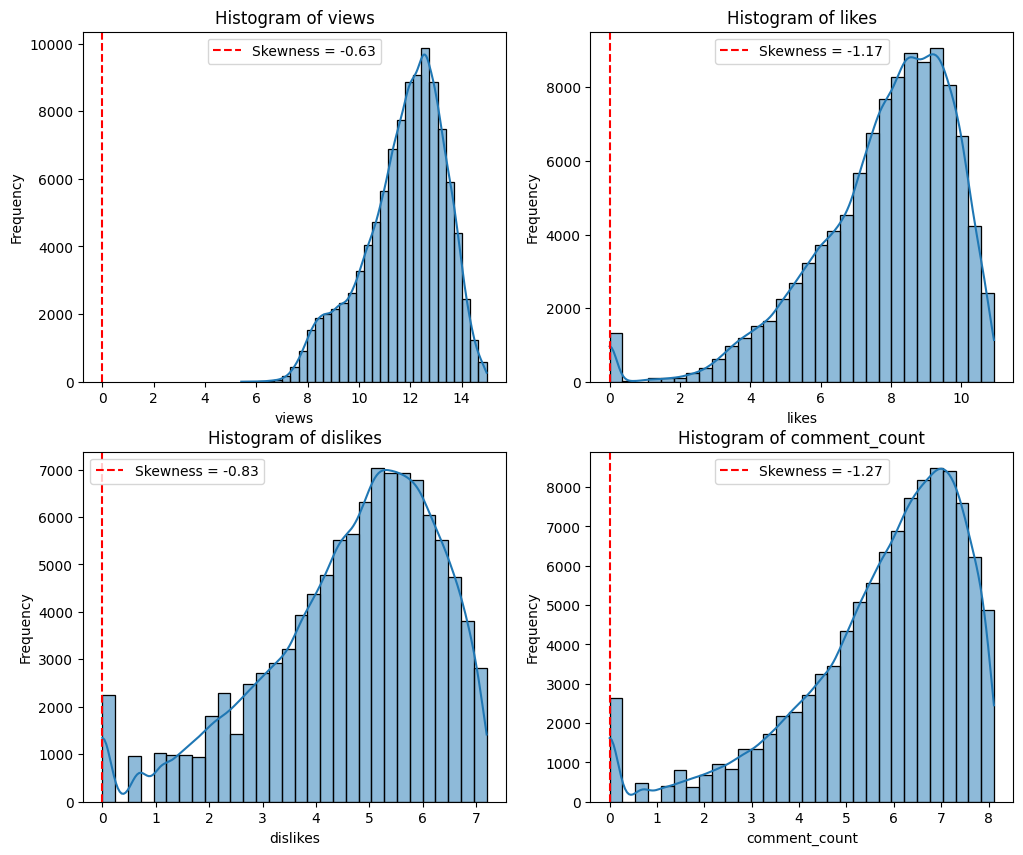

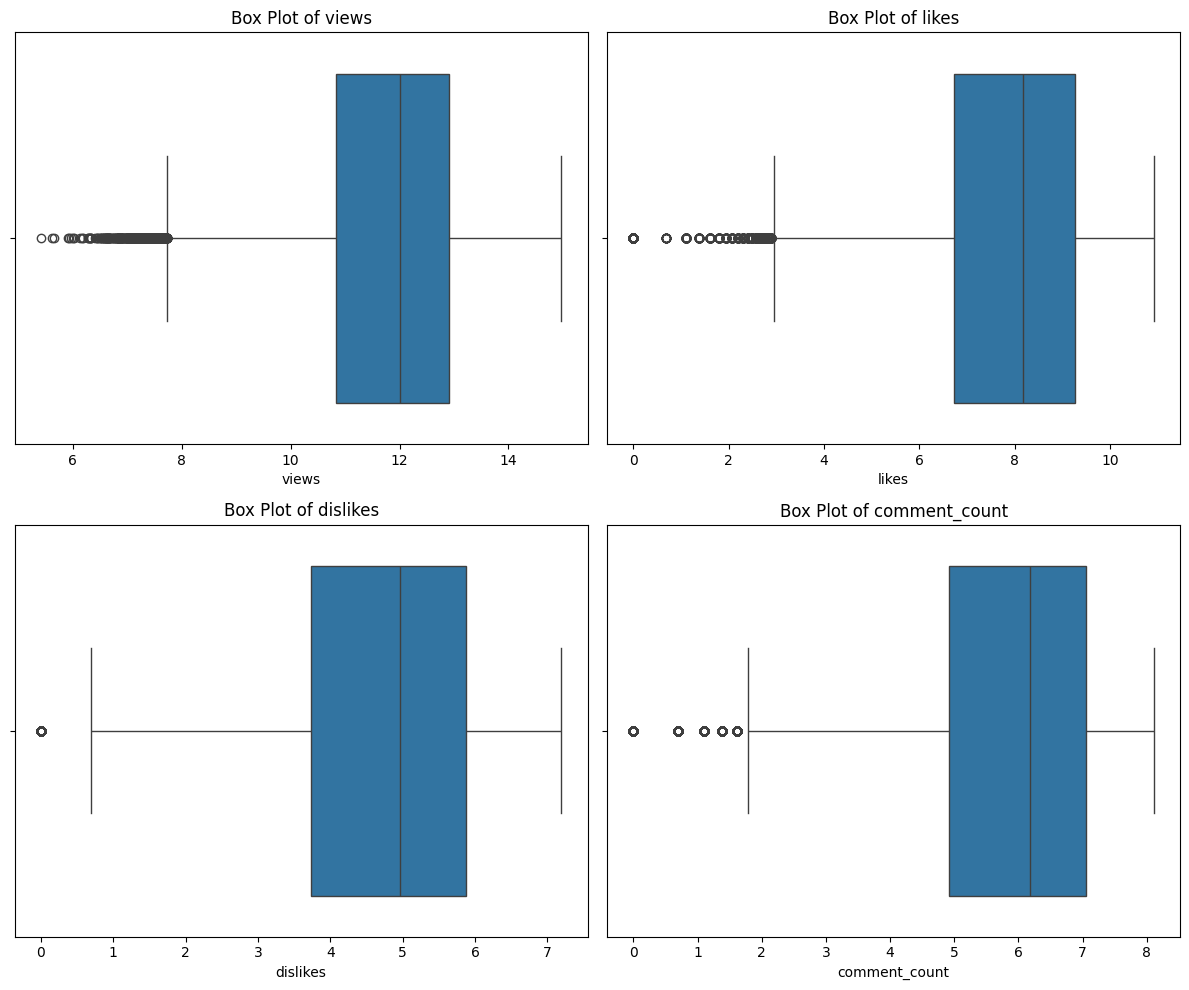

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the relevant numerical features
# Example list of numerical columns
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']  # Adjust as necessary

# Step 1: Calculate skewness for numerical features
skewness = df[numerical_cols].skew()
print("Skewness of numerical features:")
print(skewness)

# Step 2: Visualize skewness using histograms and box plots
plt.figure(figsize=(12, 10))

# Histograms
plt.subplot(2, 2, 1)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.axvline(x=0, color='red', linestyle='--', label='Skewness = {:.2f}'.format(skewness[col]))
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

# Box Plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


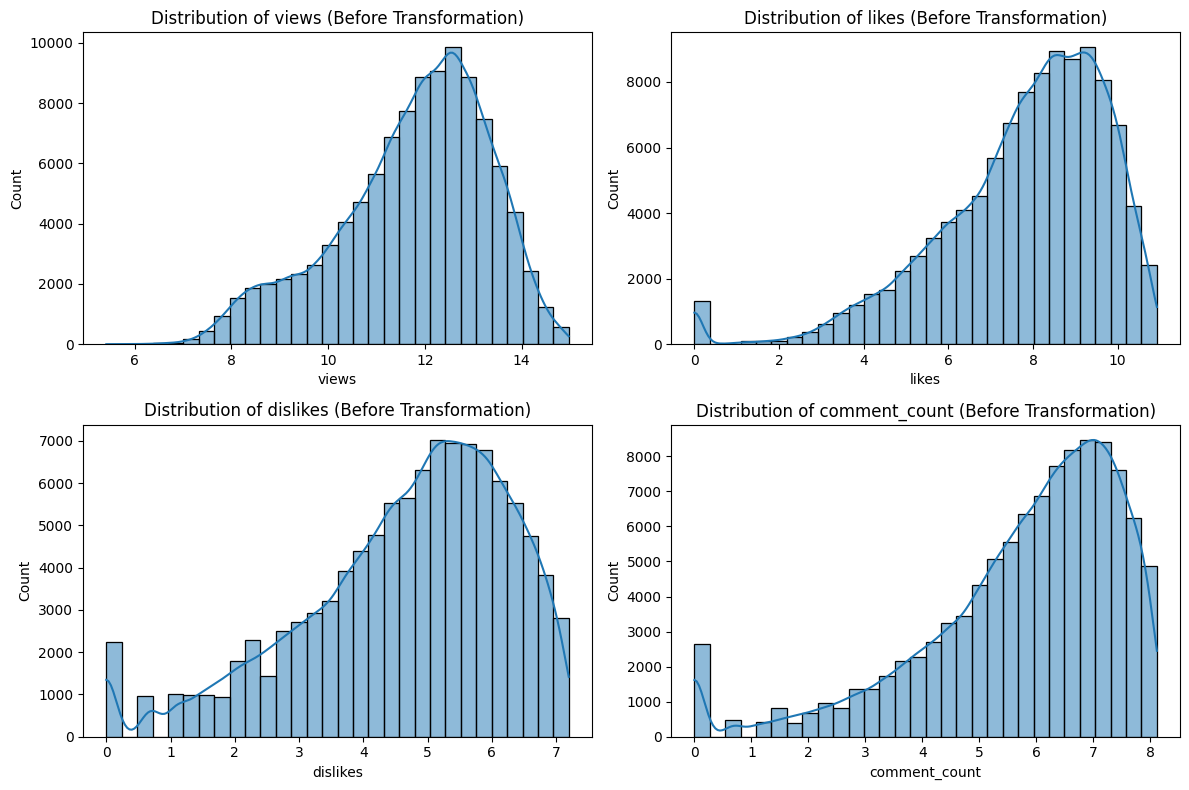

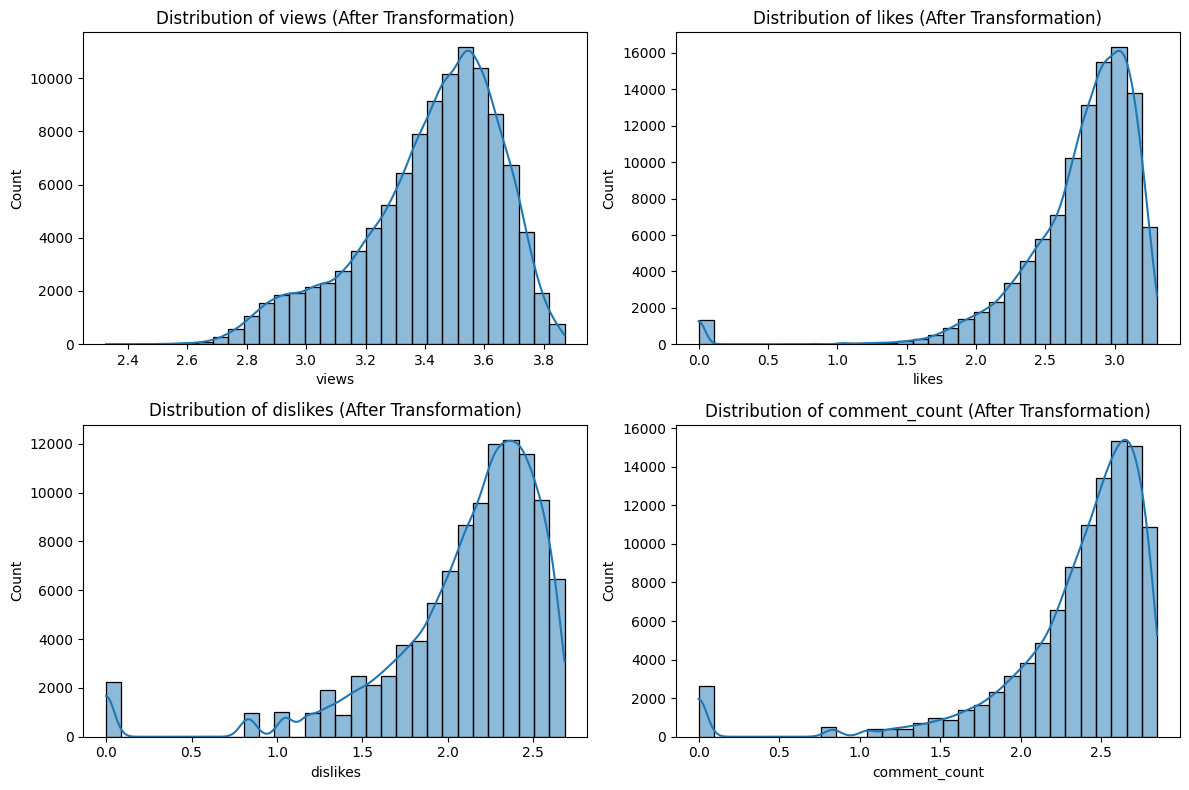

Skewness after transformation:
views           -0.796491
likes           -2.955052
dislikes        -2.080072
comment_count   -2.666715
dtype: float64


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and you have already identified skewed features
# Example of skewness values (adjust as necessary)
skewed_features = ['views', 'likes', 'dislikes', 'comment_count']  # Adjust based on your analysis

# Function to apply transformations
def transform_skewed_data(data, feature):
    if data[feature].skew() > 0:  # Right skewed
        # Apply log transformation
        data[feature] = np.log1p(data[feature])  # log1p for log(1 + x)
    elif data[feature].skew() < 0:  # Left skewed
        # Apply square root transformation
        data[feature] = np.sqrt(data[feature])
    return data

# Step 1: Visualize before transformation
plt.figure(figsize=(12, 8))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} (Before Transformation)')
plt.tight_layout()
plt.show()

# Step 2: Apply transformations to skewed features
for feature in skewed_features:
    df = transform_skewed_data(df, feature)

# Step 3: Visualize after transformation
plt.figure(figsize=(12, 8))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} (After Transformation)')
plt.tight_layout()
plt.show()

# Optional: Check skewness after transformation
new_skewness = df[skewed_features].skew()
print("Skewness after transformation:")
print(new_skewness)


Skewness after Yeo-Johnson transformation:
views           -0.087706
likes           -0.321417
dislikes        -0.328503
comment_count   -0.480527
dtype: float64


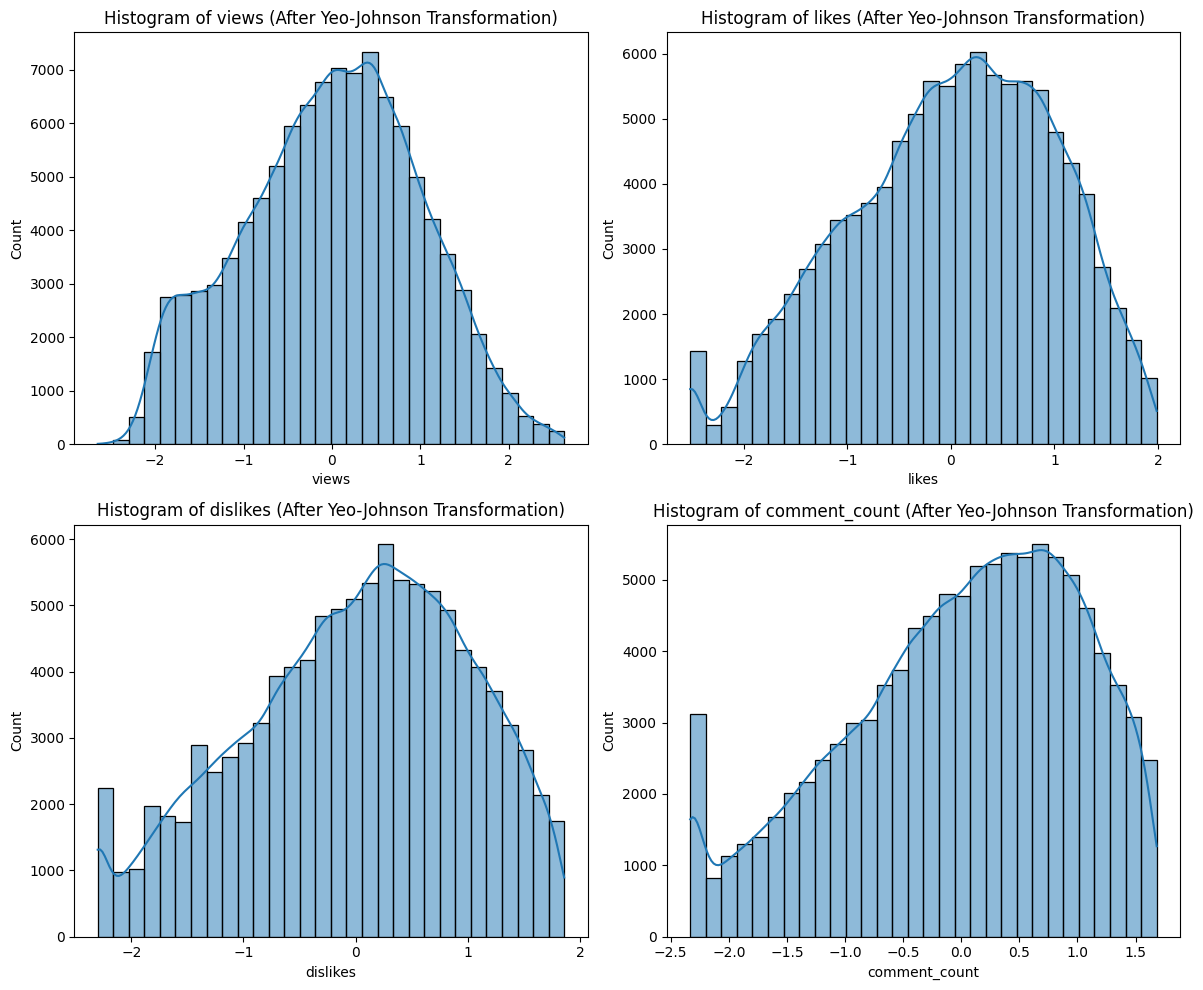

In [148]:
from sklearn.preprocessing import PowerTransformer

# Initialize the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Select numerical columns to transform
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

# Apply the transformation
df[numerical_cols] = pt.fit_transform(df[numerical_cols])

# Check skewness after Yeo-Johnson transformation
new_skewness = df[numerical_cols].skew()
print("Skewness after Yeo-Johnson transformation:")
print(new_skewness)

# Visualize the transformed data
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col} (After Yeo-Johnson Transformation)')
plt.tight_layout()
plt.show()


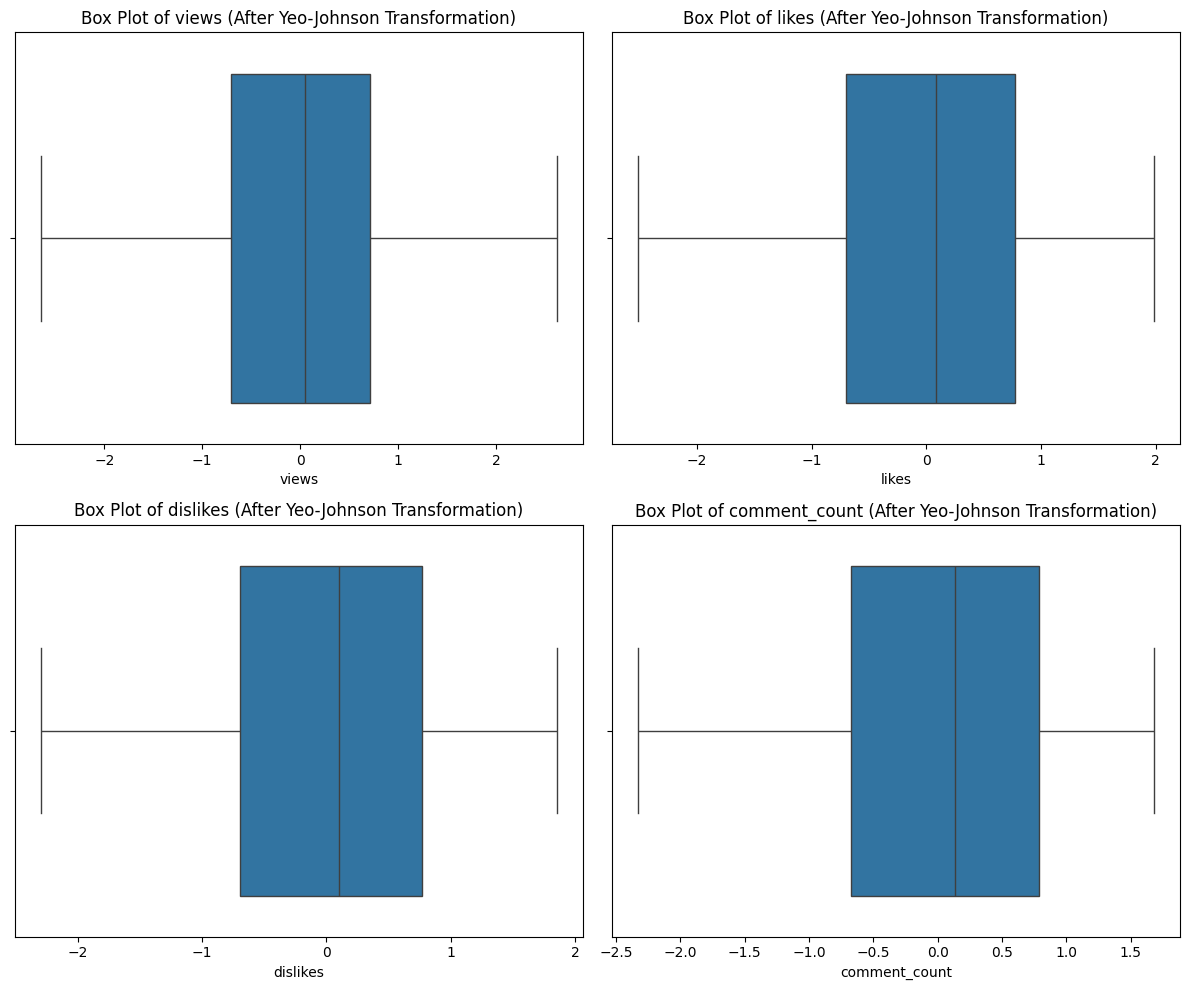

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (After Yeo-Johnson Transformation)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA):

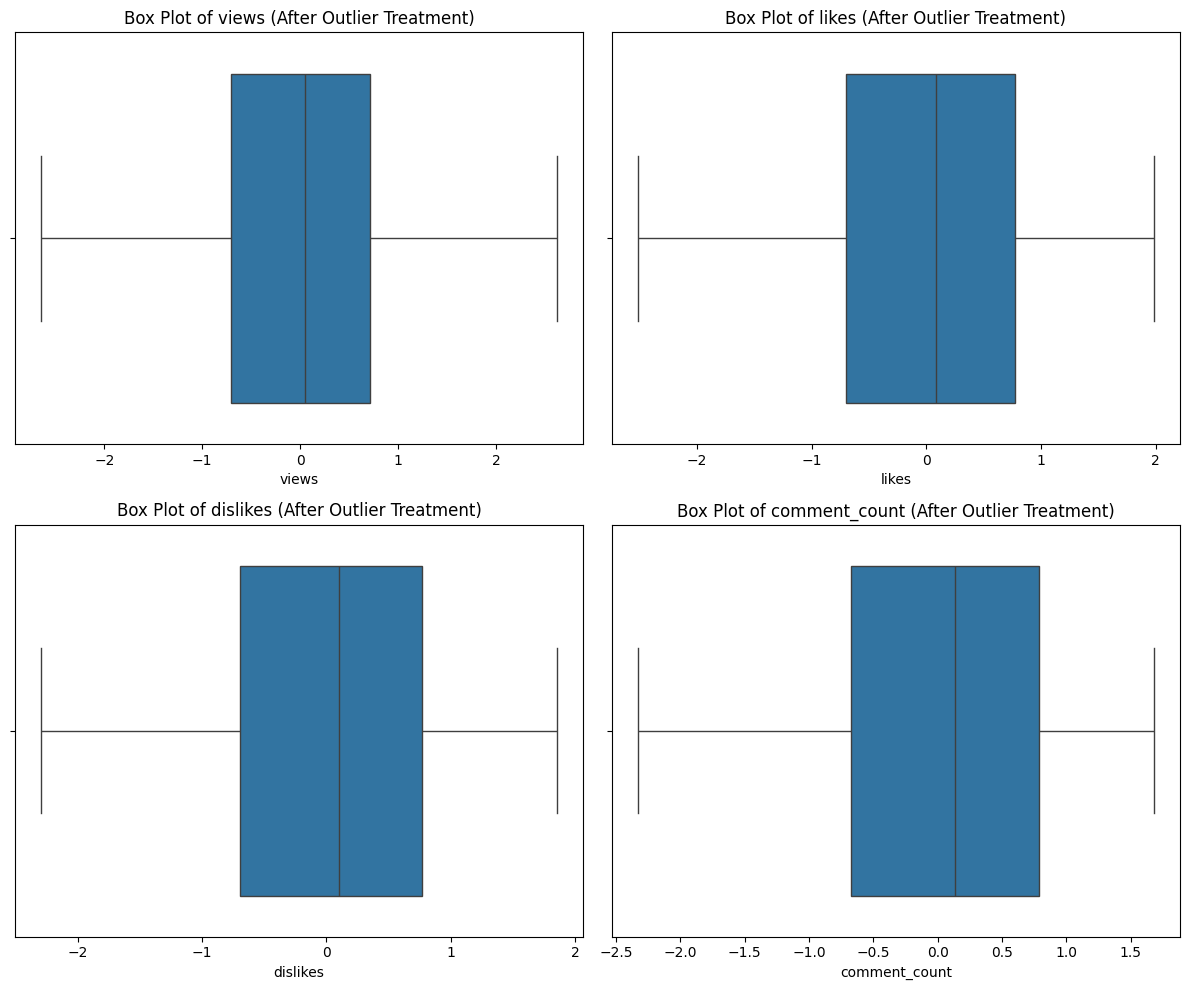

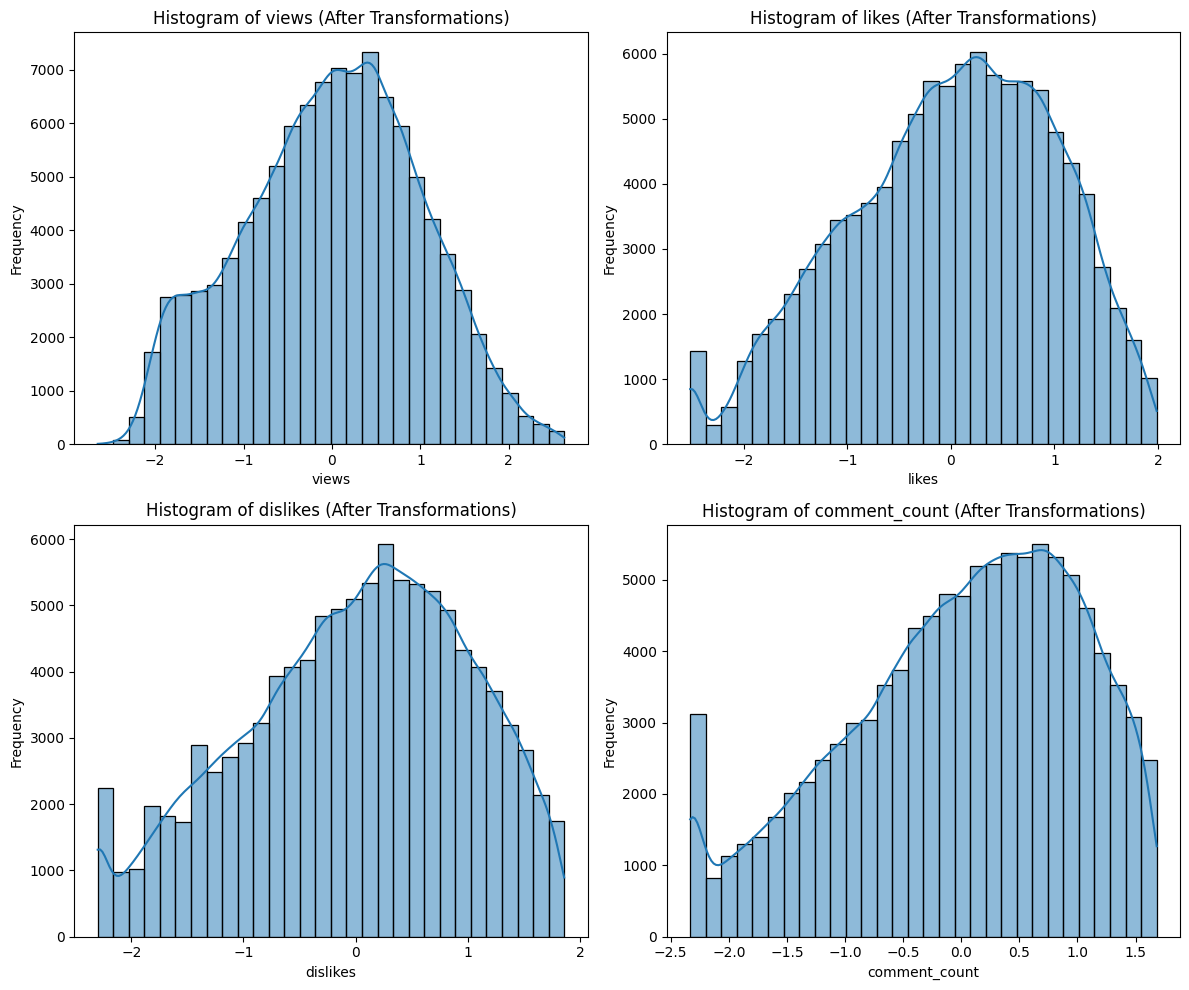

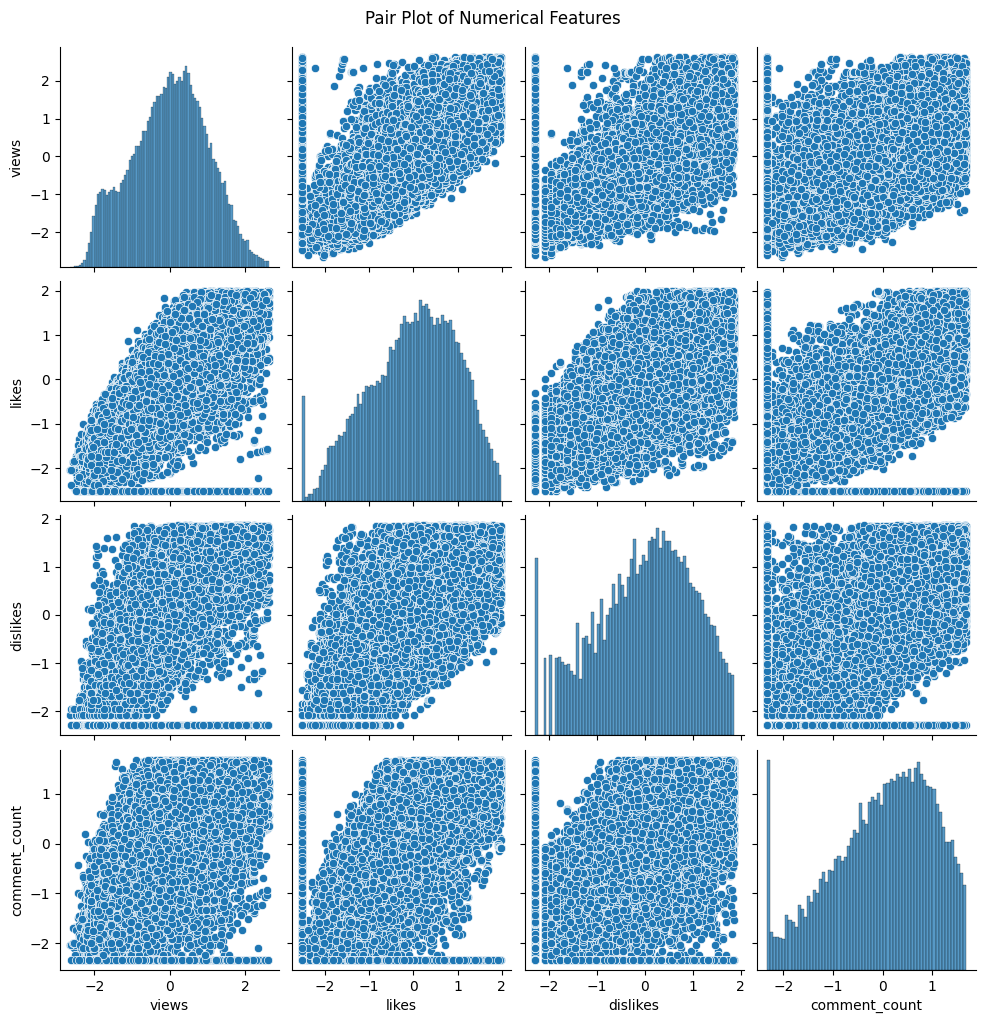

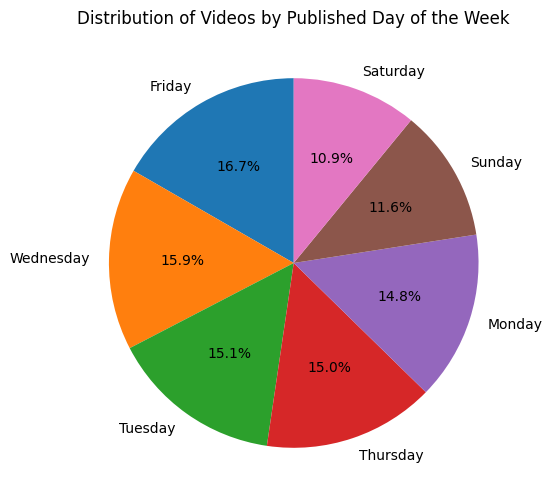

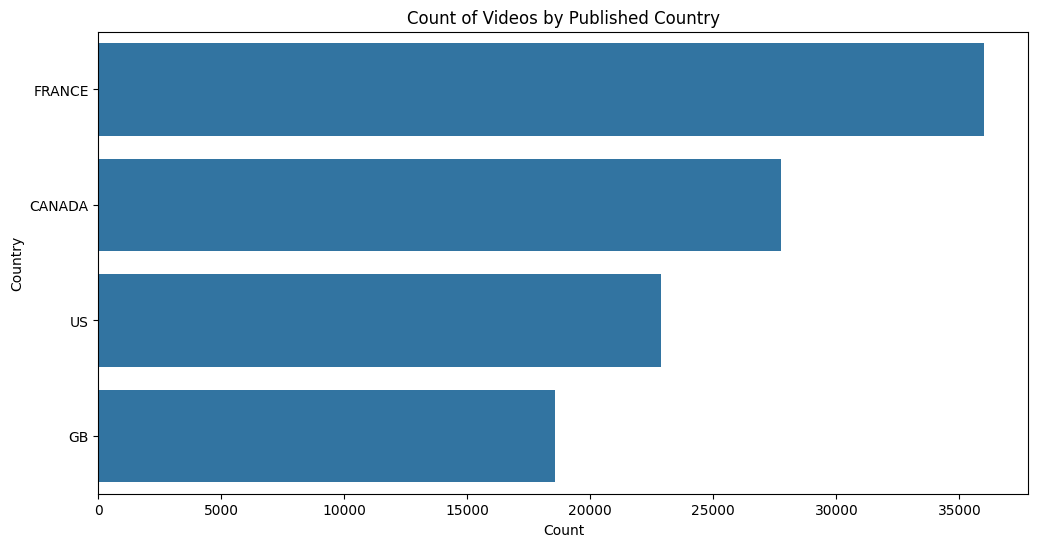

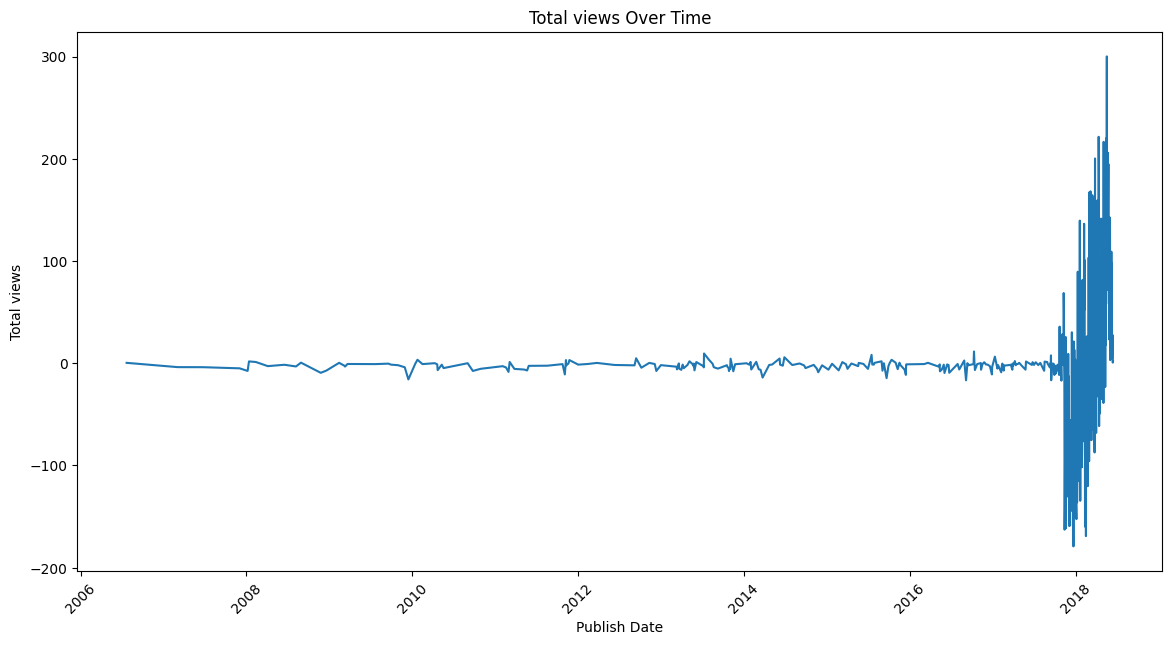

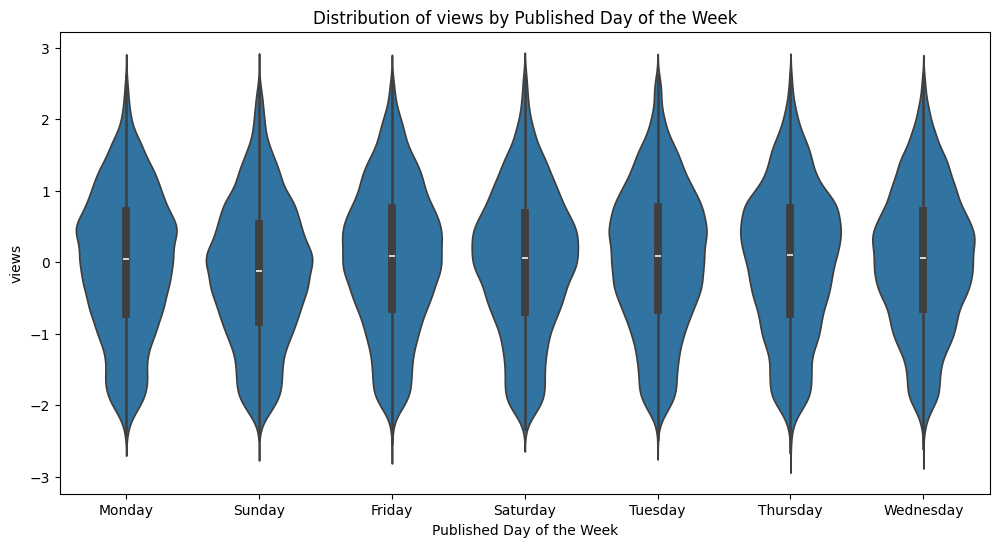

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with transformed features

# 1. Box Plot (after outlier treatment)
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (After Outlier Treatment)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 2. Hist Plot (after transformations)
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col} (After Transformations)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Pair Plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# 4. Pie Chart (for categorical features like published_day_of_week)
plt.figure(figsize=(8, 6))
df['published_day_of_week'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Videos by Published Day of the Week')
plt.ylabel('')
plt.show()

# 6. Count Plot (for categorical features like published_country)
plt.figure(figsize=(12, 6))
sns.countplot(y='publish_country', data=df, order=df['publish_country'].value_counts().index)
plt.title('Count of Videos by Published Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# 7. Line Plot (for time series analysis, e.g., likes over time)
# Ensure 'publish_date' is a datetime type
df['publish_date'] = pd.to_datetime(df['publish_date'])
likes_over_time = df.groupby('publish_date')['views'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=likes_over_time, x='publish_date', y='views')
plt.title('Total views Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Total views')
plt.xticks(rotation=45)
plt.show()

# 8. Violin Plot (to visualize distribution of likes by published_day_of_week)
plt.figure(figsize=(12, 6))
sns.violinplot(x='published_day_of_week', y='views', data=df)
plt.title('Distribution of views by Published Day of the Week')
plt.xlabel('Published Day of the Week')
plt.ylabel('views')
plt.show()


# Feature Engineering:

In [151]:
# Convert publish_date to datetime if not already done
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Extract date components
df['publish_year'] = df['publish_date'].dt.year
df['publish_month'] = df['publish_date'].dt.month
df['publish_day'] = df['publish_date'].dt.day
df['publish_day_of_week'] = df['publish_date'].dt.day_name()
df['is_weekend'] = df['publish_day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Create engagement ratios
df['likes_per_view'] = df['likes'] / df['views']
df['dislikes_per_view'] = df['dislikes'] / df['views']
df['comments_per_view'] = df['comment_count'] / df['views']

# Check the new features
print(df[['publish_year', 'publish_month', 'publish_day', 'is_weekend', 
           'likes_per_view', 'dislikes_per_view', 'comments_per_view']].head())


    publish_year  publish_month  publish_day  is_weekend  likes_per_view  \
3           2017             11           13           0        1.255269   
5           2017             11           13           0       -4.156626   
8           2017             11           13           0        0.058346   
10          2017             11           13           0        1.963431   
11          2017             11           13           0        1.469808   

    dislikes_per_view  comments_per_view  
3            2.142831           2.189152  
5           -6.116680          -5.571686  
8           -0.020240          -0.079086  
10           2.325629           1.233924  
11          -2.497507          -3.355570  


In [152]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['published_day_of_week', 'publish_country'], drop_first=True)

# If you have ordinal features, use Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category_id'] = label_encoder.fit_transform(df['category_id'])

# Check the first few rows after encoding
print(df.head())


   trending_date  category_id publish_date      time_frame  \
3       17.14.11            9   2017-11-13  11:00 to 11:59   
5       17.14.11           13   2017-11-13  19:00 to 19:59   
8       17.14.11            0   2017-11-13  14:00 to 14:59   
10      17.14.11            4   2017-11-13    2:00 to 2:59   
11      17.14.11            9   2017-11-13    3:00 to 3:59   

                                                 tags     views     likes  \
3   rhett and link|"gmm""|""good mythical morning"...  0.591243  0.742169   
5   ijustine|"week with iPhone X""|""iphone x""|""... -0.171958  0.714766   
8   Trailer|"Hugh Jackman""|""Michelle Williams""|...  1.320724  0.077059   
10  NFL|"Football""|""offense""|""defense""|""afc"... -0.418283 -0.821270   
11  The Walking Dead|"shiva""|""tiger""|""king eze... -0.258016 -0.379234   

    dislikes  comment_count  comments_disabled  ...  comments_per_view  \
3   1.266934       1.294321              False  ...           2.189152   
5   1.051813    

In [153]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose a scaler; here we use StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count', 
                  'likes_per_view', 'dislikes_per_view', 'comments_per_view']

# Scale the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the first few rows after scaling
print(df[numerical_cols].head())


       views     likes  dislikes  comment_count  likes_per_view  \
3   0.591243  0.742169  1.266934       1.294321        0.004051   
5  -0.171958  0.714766  1.051813       0.958097       -0.001710   
8   1.320724  0.077059 -0.026731      -0.104451        0.002777   
10 -0.418283 -0.821270 -0.972771      -0.516129        0.004805   
11 -0.258016 -0.379234  0.644397       0.865791        0.004279   

    dislikes_per_view  comments_per_view  
3            0.010962           0.009487  
5           -0.026032          -0.023070  
8            0.001274          -0.000029  
10           0.011781           0.005479  
11          -0.009822          -0.013774  


In [154]:
print(df.dtypes)

trending_date                              object
category_id                                 int64
publish_date                       datetime64[ns]
time_frame                                 object
tags                                       object
views                                     float64
likes                                     float64
dislikes                                  float64
comment_count                             float64
comments_disabled                            bool
ratings_disabled                             bool
video_error_or_removed                       bool
publish_year                                int32
publish_month                               int32
publish_day                                 int32
publish_day_of_week                        object
is_weekend                                  int32
likes_per_view                            float64
dislikes_per_view                         float64
comments_per_view                         float64


In [155]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features to scale
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count', 'likes_per_view', 'dislikes_per_view', 'comments_per_view']

# Initialize scaler (choose either StandardScaler or MinMaxScaler)
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the scaled values
print(df[numerical_cols].head())


       views     likes  dislikes  comment_count  likes_per_view  \
3   0.591243  0.742169  1.266934       1.294321        0.004051   
5  -0.171958  0.714766  1.051813       0.958097       -0.001710   
8   1.320724  0.077059 -0.026731      -0.104451        0.002777   
10 -0.418283 -0.821270 -0.972771      -0.516129        0.004805   
11 -0.258016 -0.379234  0.644397       0.865791        0.004279   

    dislikes_per_view  comments_per_view  
3            0.010962           0.009487  
5           -0.026032          -0.023070  
8            0.001274          -0.000029  
10           0.011781           0.005479  
11          -0.009822          -0.013774  


In [156]:
# Check the first few rows of the transformed DataFrame
print(df.head())


   trending_date  category_id publish_date      time_frame  \
3       17.14.11            9   2017-11-13  11:00 to 11:59   
5       17.14.11           13   2017-11-13  19:00 to 19:59   
8       17.14.11            0   2017-11-13  14:00 to 14:59   
10      17.14.11            4   2017-11-13    2:00 to 2:59   
11      17.14.11            9   2017-11-13    3:00 to 3:59   

                                                 tags     views     likes  \
3   rhett and link|"gmm""|""good mythical morning"...  0.591243  0.742169   
5   ijustine|"week with iPhone X""|""iphone x""|""... -0.171958  0.714766   
8   Trailer|"Hugh Jackman""|""Michelle Williams""|...  1.320724  0.077059   
10  NFL|"Football""|""offense""|""defense""|""afc"... -0.418283 -0.821270   
11  The Walking Dead|"shiva""|""tiger""|""king eze... -0.258016 -0.379234   

    dislikes  comment_count  comments_disabled  ...  comments_per_view  \
3   1.266934       1.294321              False  ...           0.009487   
5   1.051813    

In [157]:
# Convert 'trending_date' to a proper datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Check the first few entries to ensure it's converted properly
print(df['trending_date'].head())


3    2017-11-14
5    2017-11-14
8    2017-11-14
10   2017-11-14
11   2017-11-14
Name: trending_date, dtype: datetime64[ns]


In [158]:
# Extract the starting hour from 'time_frame'
df['start_hour'] = df['time_frame'].str.split(' to ').str[0].str.split(':').str[0].astype(int)

# Check the first few rows to confirm the transformation
print(df[['time_frame', 'start_hour']].head())


        time_frame  start_hour
3   11:00 to 11:59          11
5   19:00 to 19:59          19
8   14:00 to 14:59          14
10    2:00 to 2:59           2
11    3:00 to 3:59           3


In [159]:
# Step 1: Tokenize the tags column into individual words
df['tags'] = df['tags'].str.split('|')

# Step 2: Flatten the list of tags and count the frequency of each tag
from collections import Counter

all_tags = [tag for sublist in df['tags'].tolist() for tag in sublist]
tag_counts = Counter(all_tags)

# Step 3: Get the top N most frequent tags
N = 15
top_N_tags = [tag for tag, count in tag_counts.most_common(N)]

# Step 4: Create new binary columns indicating if each tag is present in the video
for tag in top_N_tags:
    df[f'tag_{tag}'] = df['tags'].apply(lambda x: 1 if tag in x else 0)

# Step 5: Drop the original 'tags' column
df = df.drop('tags', axis=1)

# Check the new columns
print(df.head())


   trending_date  category_id publish_date      time_frame     views  \
3     2017-11-14            9   2017-11-13  11:00 to 11:59  0.591243   
5     2017-11-14           13   2017-11-13  19:00 to 19:59 -0.171958   
8     2017-11-14            0   2017-11-13  14:00 to 14:59  1.320724   
10    2017-11-14            4   2017-11-13    2:00 to 2:59 -0.418283   
11    2017-11-14            9   2017-11-13    3:00 to 3:59 -0.258016   

       likes  dislikes  comment_count  comments_disabled  ratings_disabled  \
3   0.742169  1.266934       1.294321              False             False   
5   0.714766  1.051813       0.958097              False             False   
8   0.077059 -0.026731      -0.104451              False             False   
10 -0.821270 -0.972771      -0.516129              False             False   
11 -0.379234  0.644397       0.865791              False             False   

    ...  tag_""funny""  tag_"interview"  tag_"music"  tag_"news" tag_"video"  \
3   ...           

In [160]:
print(df.dtypes)


trending_date                      datetime64[ns]
category_id                                 int64
publish_date                       datetime64[ns]
time_frame                                 object
views                                     float64
likes                                     float64
dislikes                                  float64
comment_count                             float64
comments_disabled                            bool
ratings_disabled                             bool
video_error_or_removed                       bool
publish_year                                int32
publish_month                               int32
publish_day                                 int32
publish_day_of_week                        object
is_weekend                                  int32
likes_per_view                            float64
dislikes_per_view                         float64
comments_per_view                         float64
published_day_of_week_Monday                 bool


# Feature Selection:

In [161]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('views', axis=1)  # Assuming 'views' is the target variable
y = df['views']

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (84132, 43), (84132,)
Testing set shape: (21033, 43), (21033,)


In [162]:
# Select only numerical features for feature selection
X_numerical = X_train.select_dtypes(include=[np.number])

from sklearn.feature_selection import SelectKBest, f_regression

# Choose the number of top features you want
k = 15  # Select the top 10 features
selector = SelectKBest(score_func=f_regression, k=k)

# Fit and transform on the numerical features only
X_new = selector.fit_transform(X_numerical, y_train)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)
selected_features = X_numerical.columns[selected_indices]
print("Selected features using SelectKBest:", selected_features)


Selected features using SelectKBest: Index(['category_id', 'likes', 'dislikes', 'comment_count', 'publish_year',
       'publish_month', 'start_hour', 'tag_[none]', 'tag_"funny"',
       'tag_"comedy"', 'tag_"humour"', 'tag_""funny""', 'tag_"humor"',
       'tag_""comedy""', 'tag_"talk show"'],
      dtype='object')


In [163]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Apply RFE
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_numerical, y_train)

# Get selected features
selected_features_rfe = X_numerical.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)


Selected features using RFE: Index(['likes', 'dislikes', 'tag_"funny"', 'tag_"humour"', 'tag_"interview"',
       'tag_"music"', 'tag_"video"', 'tag_"humor"', 'tag_"2017"',
       'tag_"talk show"'],
      dtype='object')


In [164]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_numerical, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_numerical.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features based on Random Forest importance:")
print(feature_importance_df.head(10))


Top features based on Random Forest importance:
              Feature  Importance
2            dislikes    0.645379
9   dislikes_per_view    0.322516
1               likes    0.015193
8      likes_per_view    0.015187
3       comment_count    0.000618
0         category_id    0.000380
10  comments_per_view    0.000338
11         start_hour    0.000141
6         publish_day    0.000100
5       publish_month    0.000076


In [165]:
# Define the final feature set
final_features = [
    'dislikes',
    'dislikes_per_view',
    'likes',
    'likes_per_view',
    'comment_count',
    'category_id',
    'tag_"funny"',
    'tag_"humour"',
    'tag_"interview"',
    'tag_"music"',
    'tag_"video"',
    'tag_"humor"',
    'tag_"2017"',
    'tag_"talk show"',
    'publish_year',
    'publish_month',
    'start_hour'
]

# Include the target variable
final_features.append('views')  # Assuming 'views' is the target variable

# Create a new DataFrame with the selected features
df_final = df[final_features]

# Display the first few rows of the new DataFrame
print(df_final.head())


    dislikes  dislikes_per_view     likes  likes_per_view  comment_count  \
3   1.266934           0.010962  0.742169        0.004051       1.294321   
5   1.051813          -0.026032  0.714766       -0.001710       0.958097   
8  -0.026731           0.001274  0.077059        0.002777      -0.104451   
10 -0.972771           0.011781 -0.821270        0.004805      -0.516129   
11  0.644397          -0.009822 -0.379234        0.004279       0.865791   

    category_id  tag_"funny"  tag_"humour"  tag_"interview"  tag_"music"  \
3             9            0             0                0            0   
5            13            0             0                0            0   
8             0            0             0                0            0   
10            4            0             0                0            0   
11            9            0             0                0            0   

    tag_"video"  tag_"humor"  tag_"2017"  tag_"talk show"  publish_year  \
3          

In [166]:
print(df_final.dtypes)

dislikes             float64
dislikes_per_view    float64
likes                float64
likes_per_view       float64
comment_count        float64
category_id            int64
tag_"funny"            int64
tag_"humour"           int64
tag_"interview"        int64
tag_"music"            int64
tag_"video"            int64
tag_"humor"            int64
tag_"2017"             int64
tag_"talk show"        int64
publish_year           int32
publish_month          int32
start_hour             int32
views                float64
dtype: object


# Split Data into Training and Testing Sets:

In [167]:
from sklearn.model_selection import train_test_split

# Assuming your final DataFrame is df_final and the target variable is 'views'

# Define features (X) and target variable (y)
X = df_final.drop('views', axis=1)  # Features
y = df_final['views']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (84132, 17)
X_test shape: (21033, 17)
y_train shape: (84132,)
y_test shape: (21033,)


# Feature Scaling:

In [168]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Select numerical features
numerical_features = ['likes', 'dislikes', 'comment_count', 'dislikes_per_view', 
                     'likes_per_view', 'start_hour', 'publish_year', 'publish_month']

# Fit and transform the training data
X_train[numerical_features] = min_max_scaler.fit_transform(X_train[numerical_features])

# Transform the testing data
X_test[numerical_features] = min_max_scaler.transform(X_test[numerical_features])

# Verify the scaling
print(X_train[numerical_features].head())


           likes  dislikes  comment_count  dislikes_per_view  likes_per_view  \
94361   0.307449  0.222575       0.332275           0.877403        0.976523   
58444   0.752603  0.800416       0.758183           0.877408        0.976524   
120615  0.750202  0.720948       0.923087           0.877408        0.976525   
10240   0.540028  0.680448       0.809426           0.877371        0.976522   
130312  0.305414  0.410433       0.332275           0.877403        0.976526   

        start_hour  publish_year  publish_month  
94361     0.739130      1.000000       0.000000  
58444     0.826087      1.000000       0.000000  
120615    1.000000      0.909091       0.909091  
10240     0.782609      1.000000       0.000000  
130312    0.000000      1.000000       0.000000  


# Build the ML Model:

In [169]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf')  # You can try 'linear', 'poly', 'sigmoid', etc.
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)


In [170]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp_model.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_model.predict(X_test)


In [171]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)


In [172]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)


In [173]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)


In [174]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train the model
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(X_train, y_train)

# Make predictions
ada_predictions = ada_model.predict(X_test)


# Model Evaluation:

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize a dictionary to hold the evaluation metrics for each model
metrics = {}

# Function to evaluate a model and store metrics
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
    r2 = r2_score(y_true, y_pred)
    
    metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }

# Evaluate each model
evaluate_model('SVR', y_test, svr_predictions)
evaluate_model('MLP Regressor', y_test, mlp_predictions)
evaluate_model('Random Forest Regressor', y_test, rf_predictions)
evaluate_model('Linear Regression', y_test, lr_predictions)
evaluate_model('Gradient Boosting', y_test, gb_predictions)
evaluate_model('AdaBoost', y_test, ada_predictions)

# Display the metrics for all models
import pandas as pd

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                              MAE       MSE      RMSE  R² Score
SVR                      0.372685  0.273527  0.522998  0.726372
MLP Regressor            0.333678  0.199150  0.446262  0.800776
Random Forest Regressor  0.012101  0.001692  0.041138  0.998307
Linear Regression        0.391681  0.285307  0.534141  0.714588
Gradient Boosting        0.247568  0.106682  0.326621  0.893279
AdaBoost                 0.412333  0.250317  0.500316  0.749591


# Hyperparameter Tuning:
As Random Forest Regressor have a good accuracy (MAE=0.012101, MSE=0.001692, RMSE=0.041138,  R² Score= 0.998307)
There is no need of Hyperparameter Tuning

# Save the Model:

In [176]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_regressor_model.pkl')
print("Model saved successfully!")


Model saved successfully!


# Test with Unseen Data:

In [177]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the model
loaded_model = joblib.load('random_forest_regressor_model.pkl')

# Generate unseen data with all required features
num_samples = 10
unseen_data = pd.DataFrame({
    'dislikes': np.random.uniform(0, 10000, size=num_samples).astype(float),
    'dislikes_per_view': np.random.uniform(0, 1, size=num_samples).astype(float),
    'likes': np.random.uniform(100, 1000000, size=num_samples).astype(float),
    'likes_per_view': np.random.uniform(0, 1, size=num_samples).astype(float),
    'comment_count': np.random.uniform(0, 50000, size=num_samples).astype(float),
    'category_id': np.random.randint(1, 31, size=num_samples).astype(int),
    'tag_"funny"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"humour"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"interview"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"music"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"video"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"humor"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"2017"': np.random.randint(0, 2, size=num_samples).astype(int),
    'tag_"talk show"': np.random.randint(0, 2, size=num_samples).astype(int),
    'publish_year': np.random.randint(2016, 2021, size=num_samples).astype(int),
    'publish_month': np.random.randint(1, 13, size=num_samples).astype(int),
    'start_hour': np.random.randint(0, 24, size=num_samples).astype(int),
})

# Add the remaining features if needed (make sure these were included during training)
# For example, add features like 'views' if they are part of the model input features
# unseen_data['views'] = np.random.uniform(1000, 5000000, size=num_samples).astype(float)

# Assuming you have a way to get true views for evaluation
# For this example, let's create some synthetic true values based on random generation
true_views = np.random.randint(1000, 5000000, size=num_samples).astype(float)

# Make predictions on the unseen data
predictions = loaded_model.predict(unseen_data)

# Evaluate predictions
mae = mean_absolute_error(true_views, predictions)
mse = mean_squared_error(true_views, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(true_views, predictions)

# Display predictions and evaluation metrics
print("Predictions on Unseen Data:")
print(predictions)
print("\nTrue Views:")
print(true_views)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Predictions on Unseen Data:
[0.43919692 0.64368733 0.64368733 1.26609473 0.64368467 0.64564591
 0.64368733 0.64823246 0.43919958 0.64564857]

True Views:
[  93546. 3333196. 2981258.   70251. 1821609. 4352927. 1063944. 3318327.
 3788106. 3358250.]

Evaluation Metrics:
Mean Absolute Error (MAE): 2418140.734123516
Mean Squared Error (MSE): 8004884506324.625
Root Mean Squared Error (RMSE): 2829290.459872338
R² Score: -2.7102943357141815
